In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path: notebook.ipynb

In [2]:
df = pd.read_csv('data/ah.csv')
df.head()

,name,score,Energy,Fat,Saturated Fat,Unsaturated Fat,Carbohydrates,Suger,Fiber,Protein,Salt,Calcium,Vitamin B2,Vitamin C,Omega3,Alpha-Linolenic Acid,Eicosapentaenoic Acid,Docosahexaenoic Acid,Vitamin B6,Vitamin D
0,AH Rundergehakt,C,228.0,16.0,7.1,6.9,0.9,0.0,0.0,20.0,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH Scharrel kipfiletblokjes,A,114.0,1.2,0.5,0.7,0.0,0.0,1.6,25.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Meester & Zn. Gerookte spekreepjes,E,305.0,27.0,11.0,16.0,0.5,0.5,0.0,15.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AH Scharrel kipfilet 2 stuks,A,114.0,1.2,0.5,0.7,0.0,0.0,1.6,25.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AH Gerookte spekreepjes,E,282.0,24.0,9.0,15.0,0.5,0.5,0.0,16.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   565 non-null    object 
 1   score                  565 non-null    object 
 2   Energy                 561 non-null    float64
 3   Fat                    561 non-null    float64
 4   Saturated Fat          561 non-null    float64
 5   Unsaturated Fat        531 non-null    float64
 6   Carbohydrates          561 non-null    float64
 7   Suger                  561 non-null    float64
 8   Fiber                  553 non-null    float64
 9   Protein                561 non-null    float64
 10  Salt                   561 non-null    float64
 11  Calcium                40 non-null     float64
 12  Vitamin B2             6 non-null      float64
 13  Vitamin C              26 non-null     float64
 14  Omega3                 4 non-null      float64
 15  Alpha-

## Data Visualization

In [4]:
feature_var = ['Energy', 'Fat', 'Saturated Fat', 'Carbohydrates', 'Suger', 'Fiber', 'Protein', 'Salt',]
selected_cols = ['score', *feature_var]
df = df[selected_cols]
df.head()

,score,Energy,Fat,Saturated Fat,Carbohydrates,Suger,Fiber,Protein,Salt
0,C,228.0,16.0,7.1,0.9,0.0,0.0,20.0,0.2
1,A,114.0,1.2,0.5,0.0,0.0,1.6,25.0,0.1
2,E,305.0,27.0,11.0,0.5,0.5,0.0,15.0,3.0
3,A,114.0,1.2,0.5,0.0,0.0,1.6,25.0,0.1
4,E,282.0,24.0,9.0,0.5,0.5,0.0,16.0,2.0


In [5]:
df.describe()

,Energy,Fat,Saturated Fat,Carbohydrates,Suger,Fiber,Protein,Salt
count,561.000000,561.000000,561.000000,561.000000,561.000000,553.000000,561.000000,561.000000
mean,218.641711,13.378734,6.094599,11.221444,3.862460,1.114141,12.433262,1.107398
std,146.287822,13.775288,8.316255,21.153347,8.719221,2.594917,8.507670,1.077498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,104.000000,2.100000,0.800000,0.500000,0.060000,0.000000,3.800000,0.120000
50%,210.000000,9.700000,2.600000,3.000000,1.000000,0.000000,13.000000,0.900000
75%,305.000000,22.000000,8.900000,8.600000,4.000000,1.000000,20.000000,2.000000
max,744.000000,82.000000,57.000000,87.000000,81.000000,17.000000,35.000000,5.300000


<Axes: xlabel='score', ylabel='Count'>

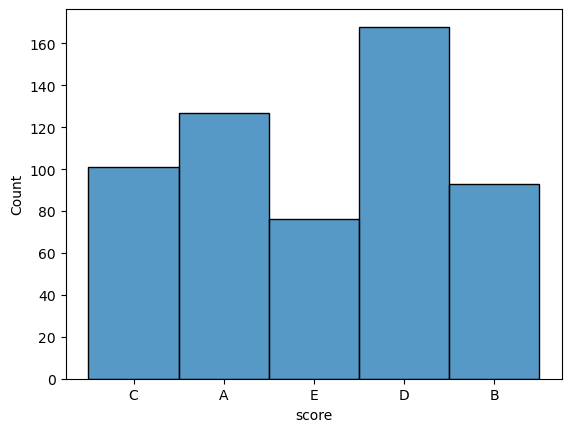

In [6]:
# A histogram plot for each score-label
sns.histplot(data=df, x=df['score'])

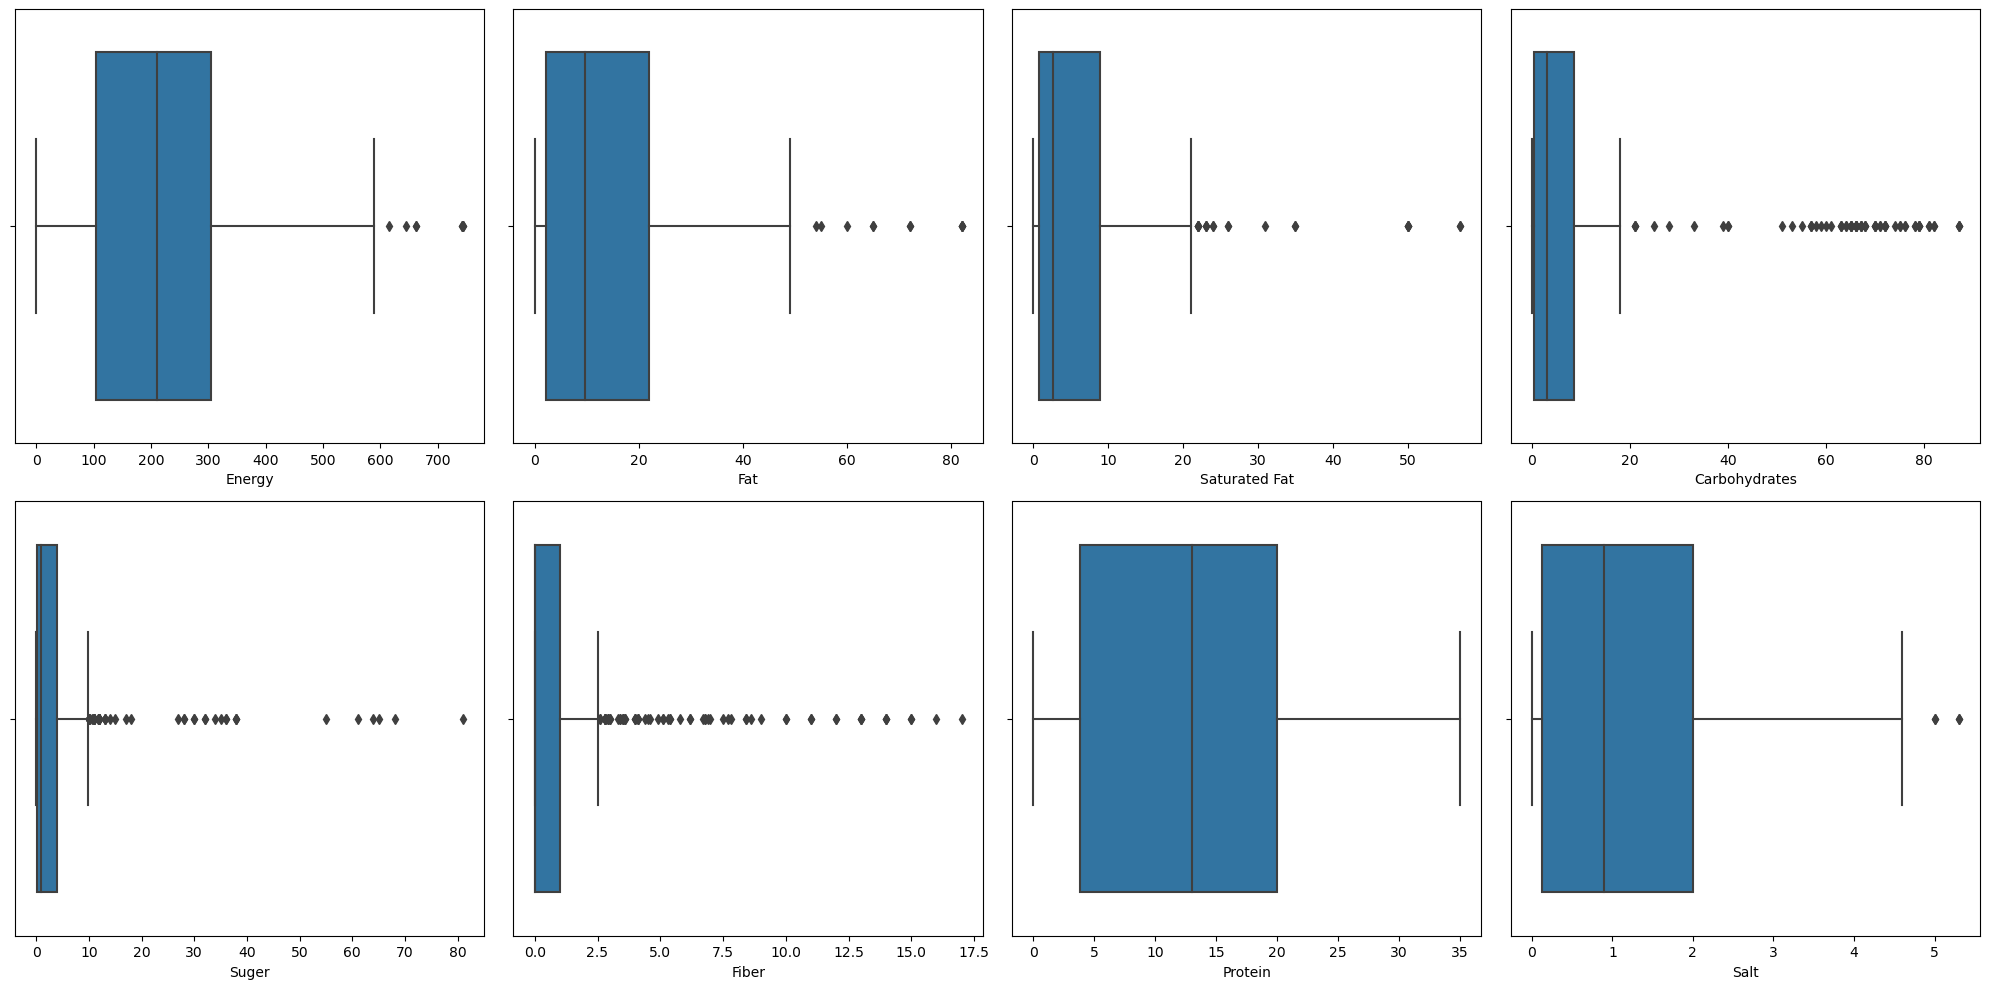

In [34]:

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axs = axs.flatten()
for i, var in enumerate (feature_var):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()
plt.show()

In [8]:
# sns.pairplot(data=df, hue='score', vars=feature_var)


/var/folders/43/5lj7tsms4q1dq44ykfhnkplm0000gn/T/ipykernel_70621/2472728135.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), fmt='.2g', annot=True)


<Axes: >

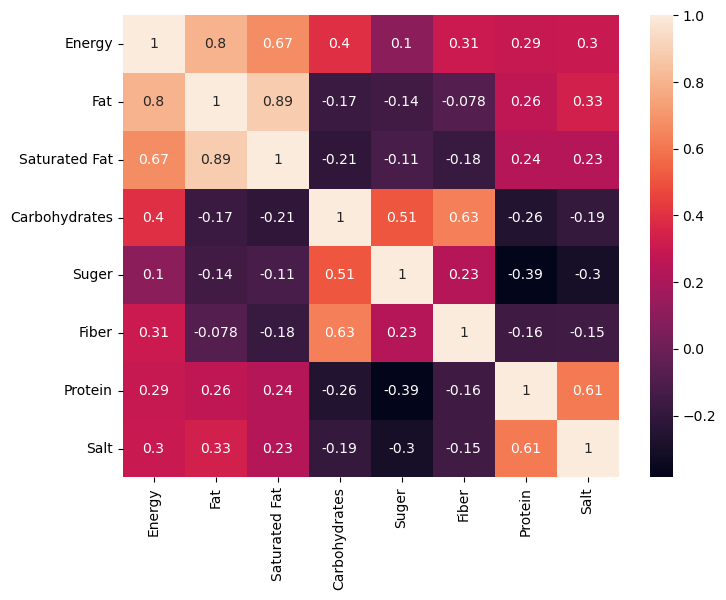

In [9]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

## Data Preprocessing

In [10]:
df.isnull().sum()

score             0
Energy            4
Fat               4
Saturated Fat     4
Carbohydrates     4
Suger             4
Fiber            12
Protein           4
Salt              4
dtype: int64

In [11]:
# Handle Null data
df['Fiber'].fillna(df['Fiber'].median(), inplace=True)
print('+ Fiber cleaned')
print(df.isnull().sum())

df.dropna(inplace=True)
print('\n+ Dropped remaining null rows(like minneral water that does not have any nutrition info)') 
print(df.isnull().sum())

+ Fiber cleaned
score            0
Energy           4
Fat              4
Saturated Fat    4
Carbohydrates    4
Suger            4
Fiber            0
Protein          4
Salt             4
dtype: int64

+ Dropped remaining null rows(like minneral water that does not have any nutrition info)
score            0
Energy           0
Fat              0
Saturated Fat    0
Carbohydrates    0
Suger            0
Fiber            0
Protein          0
Salt             0
dtype: int64


## Machine Learning Training

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('score', axis=1)
y = df['score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalize X values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

def kfold_cv(model, X, y, k=10, scoring='accuracy', verbosePlot=True):
    '''
    Perform k-fold cross validation by accuracy
    '''
    scores = cross_val_score(model, X, y, cv=k, scoring=scoring)
    print(f'Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})')

    if(verbosePlot):
        # plot the scores
        plt.figure(figsize=(4, 3))
        plt.plot(range(1, k+1), scores)
        plt.xlabel('Fold')
        plt.ylabel('Accuracy')
        plt.show()
    
    return scores

In [14]:
# To keep track of model scores and compare them later
model_scores = {}

### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
lrc = LogisticRegression()
lrc.fit(X_train, y_train)

LogisticRegression()

Accuracy: 0.45 (+/- 0.07)


/Users/parsa/lib/miniconda3/envs/mlp/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/parsa/lib/miniconda3/envs/mlp/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

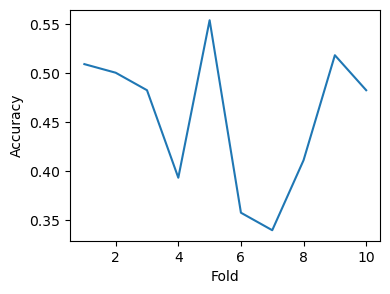

In [16]:
lrc_scores = kfold_cv(lrc, X, y, verbosePlot=True)
model_scores['Logistic Regression'] = lrc_scores

### Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier()
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [18]:

dtree = DecisionTreeClassifier( max_depth=grid_search.best_params_['max_depth'], \
                                min_samples_leaf=grid_search.best_params_['min_samples_leaf'], \
                                min_samples_split=grid_search.best_params_['min_samples_split'], \
                                random_state=0)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=8, random_state=0)

Accuracy: 0.81 (+/- 0.07)


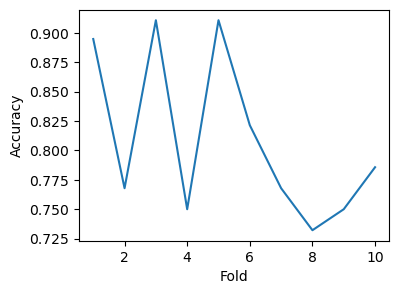

In [19]:
dtree_scores = kfold_cv(dtree, X, y, verbosePlot=True)
model_scores['Decision Tree'] = dtree_scores

### Random Forests

In [20]:
# Random Forest implementation

from sklearn.ensemble import RandomForestClassifier

params_dt = {
    'n_estimators': [100, 300],
    'max_depth': [3, 4, 5, 6],
    'max_features': [0.2, 0.5, 0.8]
}

# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                            param_grid=params_dt,
                            scoring='accuracy',
                            cv=10,
)

# Fit 'grid_dt' to the training data
grid_dt.fit(X_train, y_train)

# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_

print('Best hyperparameters:\n', best_hyperparams)

Best hyperparameters:
 {'max_depth': 6, 'max_features': 0.8, 'n_estimators': 300}


In [21]:
rfc = RandomForestClassifier(n_estimators=best_hyperparams['n_estimators'], \
                            max_depth=best_hyperparams['max_depth'], \
                            max_features=best_hyperparams['max_features'], \
                            random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features=0.8, n_estimators=300,
                       random_state=0)

Accuracy: 0.82 (+/- 0.06)


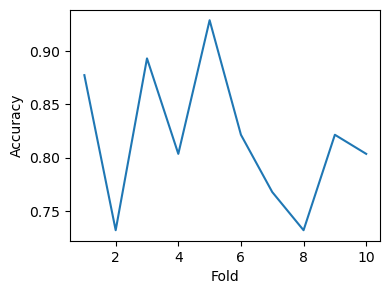

In [22]:
rfc_scores = kfold_cv(rfc, X, y, verbosePlot=True)
model_scores['Random Forest'] = rfc_scores

### Support Vector Machine

In [23]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')

svc.fit(X_train, y_train)


SVC(kernel='linear')

Accuracy: 0.67 (+/- 0.08)


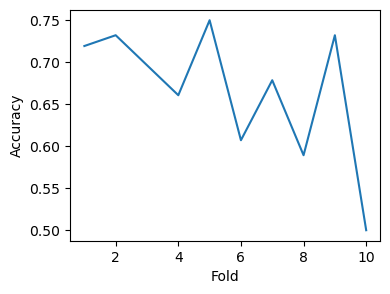

In [24]:
svc_scores = kfold_cv(svc, X, y, verbosePlot=True)
model_scores['SVM'] = svc_scores

### K-Nearest Neighbor

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_values = np.arange(1, 20)
train_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = kfold_cv(knn, X, y, verbosePlot=False)
    train_scores.append(np.mean(scores))

Accuracy: 0.76 (+/- 0.08)
Accuracy: 0.69 (+/- 0.08)
Accuracy: 0.65 (+/- 0.08)
Accuracy: 0.65 (+/- 0.06)
Accuracy: 0.64 (+/- 0.08)
Accuracy: 0.63 (+/- 0.07)
Accuracy: 0.61 (+/- 0.08)
Accuracy: 0.62 (+/- 0.07)
Accuracy: 0.61 (+/- 0.07)
Accuracy: 0.61 (+/- 0.07)
Accuracy: 0.59 (+/- 0.06)
Accuracy: 0.57 (+/- 0.05)
Accuracy: 0.57 (+/- 0.05)
Accuracy: 0.57 (+/- 0.04)
Accuracy: 0.55 (+/- 0.04)
Accuracy: 0.55 (+/- 0.05)
Accuracy: 0.52 (+/- 0.05)
Accuracy: 0.50 (+/- 0.08)
Accuracy: 0.50 (+/- 0.07)


In [26]:
# sns.lineplot(x=k_values, y=train_scores, marker='o')
# plt.xlabel("K Values")
# plt.ylabel("Accuracy Score")

best_idx = np.argmax(train_scores)
best_k = k_values[best_idx]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

Accuracy: 0.76 (+/- 0.08)


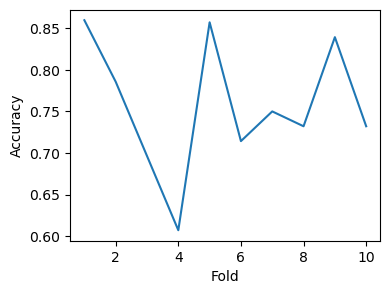

In [27]:
knn_scores = kfold_cv(knn, X, y, verbosePlot=True)
model_scores['KNN'] = knn_scores

### Neural Network

In [28]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(32, 24, 16), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(32, 24, 16), max_iter=1000)

Accuracy: 0.68 (+/- 0.08)


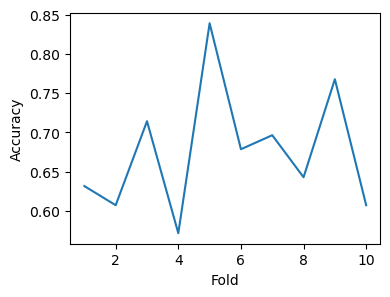

In [29]:
nn_scores = kfold_cv(mlp, X, y, verbosePlot=True)
model_scores['Neural Network'] = nn_scores

## Model Comparision and t-test

In [30]:
model_scores

{'Logistic Regression': array([0.50877193, 0.5       , 0.48214286, 0.39285714, 0.55357143,
        0.35714286, 0.33928571, 0.41071429, 0.51785714, 0.48214286]),
 'Decision Tree': array([0.89473684, 0.76785714, 0.91071429, 0.75      , 0.91071429,
        0.82142857, 0.76785714, 0.73214286, 0.75      , 0.78571429]),
 'Random Forest': array([0.87719298, 0.73214286, 0.89285714, 0.80357143, 0.92857143,
        0.82142857, 0.76785714, 0.73214286, 0.82142857, 0.80357143]),
 'SVM': array([0.71929825, 0.73214286, 0.69642857, 0.66071429, 0.75      ,
        0.60714286, 0.67857143, 0.58928571, 0.73214286, 0.5       ]),
 'KNN': array([0.85964912, 0.78571429, 0.69642857, 0.60714286, 0.85714286,
        0.71428571, 0.75      , 0.73214286, 0.83928571, 0.73214286]),
 'Neural Network': array([0.63157895, 0.60714286, 0.71428571, 0.57142857, 0.83928571,
        0.67857143, 0.69642857, 0.64285714, 0.76785714, 0.60714286])}

In [31]:
# t-test for pair of models:

from scipy.stats import ttest_ind

def ttest(model1, model2):
    '''
    Perform t-test for pair of models
    '''
    t, p = ttest_ind(model_scores[model1], model_scores[model2])
    print(f'{model1} vs {model2}: t={t:.2f}, p={p:.2f}')



In [32]:
# compare all models with each other
model_names = list(model_scores.keys())
for i in range(len(model_names)):
    for j in range(i+1, len(model_names)):
        ttest(model_names[i], model_names[j])

Logistic Regression vs Decision Tree: t=-10.98, p=0.00
Logistic Regression vs Random Forest: t=-11.64, p=0.00
Logistic Regression vs SVM: t=-6.20, p=0.00
Logistic Regression vs KNN: t=-8.82, p=0.00
Logistic Regression vs Neural Network: t=-6.35, p=0.00
Decision Tree vs Random Forest: t=-0.29, p=0.77
Decision Tree vs SVM: t=4.24, p=0.00
Decision Tree vs KNN: t=1.53, p=0.14
Decision Tree vs Neural Network: t=3.90, p=0.00
Random Forest vs SVM: t=4.65, p=0.00
Random Forest vs KNN: t=1.85, p=0.08
Random Forest vs Neural Network: t=4.28, p=0.00
SVM vs KNN: t=-2.55, p=0.02
SVM vs Neural Network: t=-0.25, p=0.80
KNN vs Neural Network: t=2.26, p=0.04


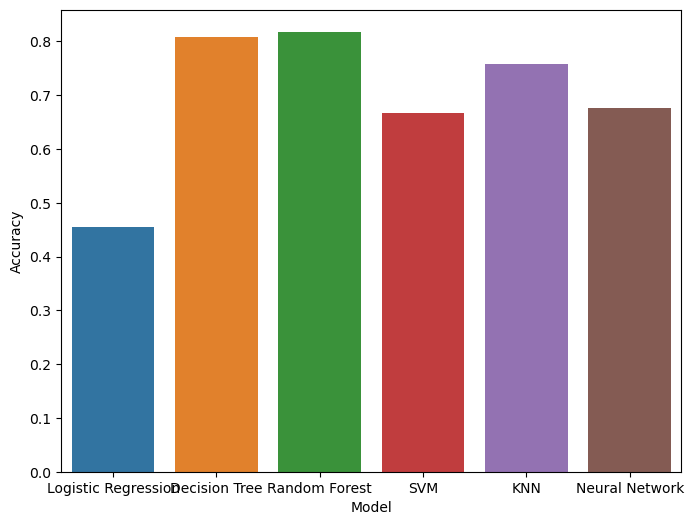

In [33]:
# plot all comparisons
plt.figure(figsize=(8, 6))
sns.barplot(x=list(model_scores.keys()), y=[np.mean(scores) for scores in model_scores.values()])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()
